<a href="https://colab.research.google.com/github/rickrdoo/PROYECTO-ML-_-NEURONAL_5G/blob/main/Modelo_5G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Columnas originales EXACTAS:
['Region', 'Sitio', 'Trabajo', 'proyecto', 'Estado', 'MasterPlan', 'fecha_visita']

 Columnas después de limpieza:
['region', 'sitio', 'trabajo', 'proyecto', 'estado', 'masterplan', 'fecha_visita']

ANALISIS: (Σ) Implementaciones 5G mensuales por region  === 



/tmp/ipython-input-1653885066.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis', width=0.3)


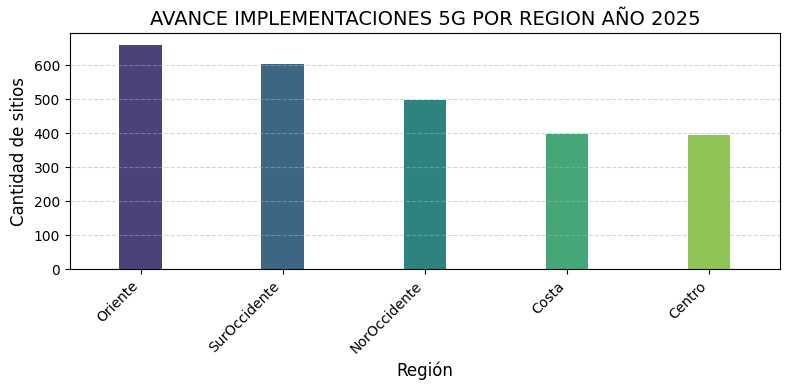


ANALISIS: cantidad de sitios Implementados por mes ===



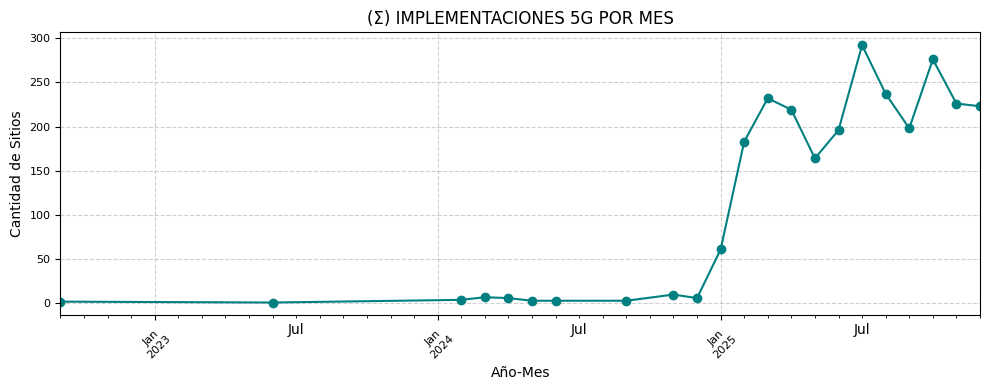


ANALISIS: variacion KPI Implementaciones mensuales por proyecto ===



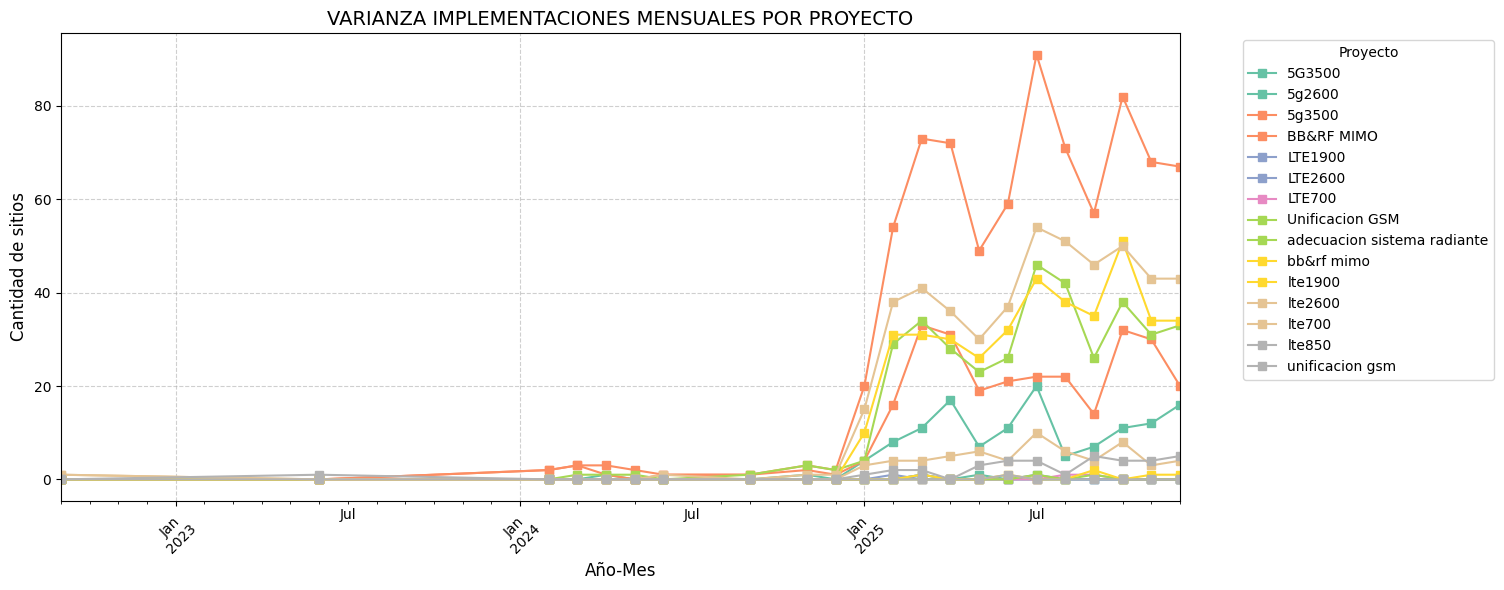

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2403 - loss: 1.5986 - val_accuracy: 0.2428 - val_loss: 1.5955
Epoch 2/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2543 - loss: 1.5902 - val_accuracy: 0.2415 - val_loss: 1.5948
Epoch 3/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2702 - loss: 1.5728 - val_accuracy: 0.2454 - val_loss: 1.5937
Epoch 4/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2550 - loss: 1.5918 - val_accuracy: 0.2454 - val_loss: 1.5957
Epoch 5/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2784 - loss: 1.5745 - val_accuracy: 0.2454 - val_loss: 1.5933
Epoch 6/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2655 - loss: 1.5783 - val_accuracy: 0.2428 - val_loss: 1.5902
Epoch 7/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2608 - loss: 1.5839 - val_accuracy: 0.2441 - val_loss: 1.5920
Epoch 8/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2381 - loss: 1.5907 - val_accuracy: 0.2415 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


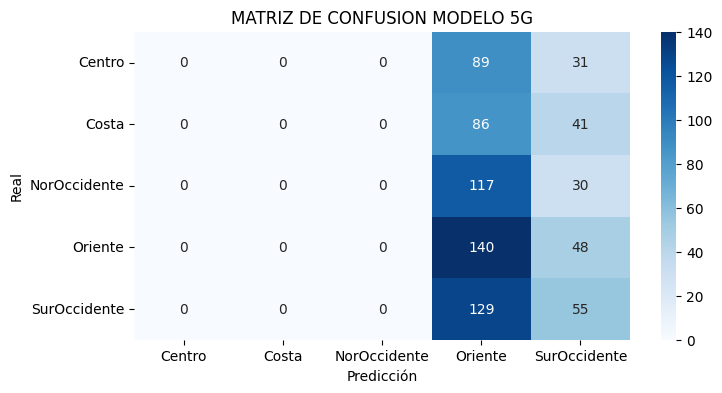


VISUALIZACION GRAFICA DE PREDICCIONES MODELO 5G ===



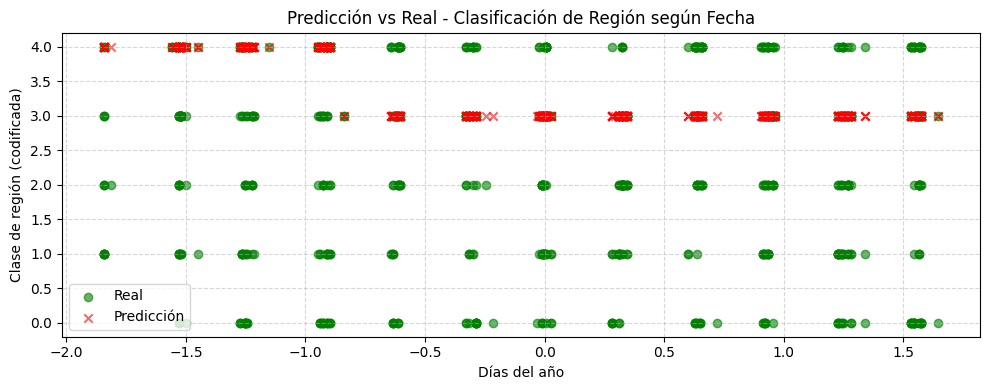


📊 MATRIZ DE CORRELACIÓN ENTRE VARIABLES ===



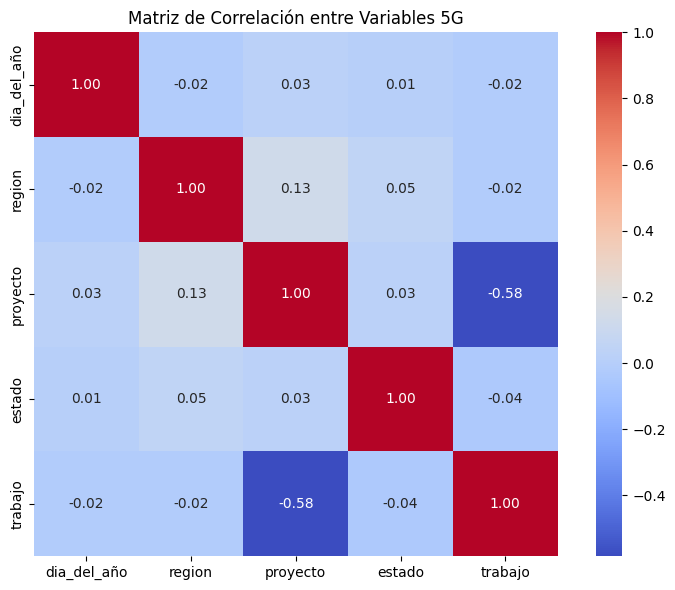


ANALISIS DE CONCLUSIONES ===

* El modelo ofrece una aproximación básica sobre cuándo (temporalmente) se están realizando más implementaciones 5G por región.

* Si el modelo logra buenos resultados, puede ser usado para prever en qué región ocurrirá una próxima implementación, basándose en la fecha.

* Con la Data 5G solo se logra un enfoque limitado ya que solo usamos la fecha, pero podemos ampliar fácilmente el analisis si agregamos más variables como proyecto, ciudad, proveedor, etc.


In [108]:
#   ////LABORATORIO RED NEURONAL _ IMPLEMENTACIONES 5G POR REGION
# 1. IMPORTACION DE LIBRARIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#_______________________________________________
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
#_______________________________________________
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# # 2. llamado del archivo DATA // ajuste de los datos
df = pd.read_csv('Reporte_NOKIA_5G_3500.csv', sep=';', encoding='latin1', parse_dates=['fecha_visita'])

# Muestra las columnas disponibles del archivo con su nombre exacto
#_______________________________________________
print("\n Columnas originales EXACTAS:")
print(df.columns.tolist())

# Normaliza los nombres de las columnas: minúsculas y sin espacios
#_______________________________________________
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n Columnas después de limpieza:")
print(df.columns.tolist())

# Con el ciclo for recorro las columnas que quiero utilizar
#_______________________________________________
for col in ['fecha_visita', 'region', 'proyecto']:
    if col not in df.columns:
        raise ValueError(f" Falta la columna: '{col}'. Verifica el nombre en el CSV.")

# con esta funcion convierto la columna de fecha
#_______________________________________________
df['fecha_visita'] = pd.to_datetime(df['fecha_visita'], errors='coerce')

# Elimino filas con fecha o región faltante
#_______________________________________________
df = df.dropna(subset=['fecha_visita', 'region'])

# # 3. Visualización cantidad de sitios implementados por región
plt.figure(figsize=(8, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis', width=0.3)

print("\nANALISIS: (Σ) Implementaciones 5G mensuales por region  === \n")
plt.title('AVANCE IMPLEMENTACIONES 5G POR REGION AÑO 2025', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Cantidad de sitios', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# # 4. Visualización Análisis temporal por mes
df['fecha_visita'] = pd.to_datetime(df['fecha_visita'])
df['año_mes'] = df['fecha_visita'].dt.to_period('M')

plt.figure(figsize=(10,4))  # Tamaño más compacto // Crear figura más pequeña y ajustada
df.groupby('año_mes')['region'].count().plot(marker='o', linestyle='-', color='teal')

print("\nANALISIS: cantidad de sitios Implementados por mes ===\n")
plt.title('(Σ) IMPLEMENTACIONES 5G POR MES', fontsize=12)
plt.ylabel('Cantidad de Sitios', fontsize=10)
plt.xlabel('Año-Mes', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Ajuste automático para evitar recortes
plt.show()
df = df.dropna(subset=['proyecto'])

# Agrupaciones por mes y proyecto
#_______________________________________________
implementaciones_por_proyecto = df.groupby(['año_mes', 'proyecto']).size().unstack(fill_value=0)

## 5. Gráfico Implementaciones mensuales por proyecto
print("\nANALISIS: variacion KPI Implementaciones mensuales por proyecto ===\n")
implementaciones_por_proyecto.plot(marker='s', linestyle='-', figsize=(12,6), colormap='Set2')
plt.title('VARIANZA IMPLEMENTACIONES MENSUALES POR PROYECTO', fontsize=14)
plt.xlabel('Año-Mes', fontsize=12)
plt.ylabel('Cantidad de sitios', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# # 6. Preparacion de datos para red neuronal

# # Feature: día del año
# #_______________________________________________
df['dia_del_año'] = df['fecha_visita'].dt.dayofyear
X = df[['dia_del_año']]

# # Target: región (clasificación)
# #_______________________________________________
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['region'])
y_cat = to_categorical(y)

# # 7. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# # 8. Escalar variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # 9. Red neuronal
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 10 Entrenamiento // entre mas grande sea el valor de epochs, mas muestras tendra la red para su prediccion
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))

# # 11. Evaluación
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nREPORTE DE CLASIFICACION===\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# # 12. Matriz de confusión
print("\nVISUALIZACION MATRIZ DE CONFUSION MODELO 5G ===\n")
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
             xticklabels=label_encoder.classes_,
             yticklabels=label_encoder.classes_)
plt.title("MATRIZ DE CONFUSION MODELO 5G")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 13. Visualización de predicciones vs reales
print("\nVISUALIZACION GRAFICA DE PREDICCIONES MODELO 5G ===\n")
plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_true, color='green', label='Real', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicción', alpha=0.6, marker='x')
plt.title('Predicción vs Real - Clasificación de Región según Fecha')
plt.xlabel('Días del año')
plt.ylabel('Clase de región (codificada)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 14. Visualización MATRIZ DE CORRELACIÓN
print("\n📊 MATRIZ DE CORRELACIÓN ENTRE VARIABLES ===\n")

# Generacion de copi  del DataFrame original para no alterar el inicial
# #_______________________________________________
df_corr = df.copy()

# Cconvierto variables categóricas a numéricas temporalmente para el procesamiento
# #_______________________________________________
for col in ['region', 'proyecto', 'estado', 'trabajo']:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Seleccionamos solo columnas numéricas y graficamos la matriz
# #_______________________________________________
corr_matrix = df_corr[['dia_del_año', 'region', 'proyecto', 'estado', 'trabajo']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación entre Variables 5G')
plt.tight_layout()
plt.show()

# 15. conclusiones
print("\nANALISIS DE CONCLUSIONES ===")
print("\n* El modelo ofrece una aproximación básica sobre cuándo (temporalmente) se están realizando más implementaciones 5G por región.")
print("\n* Si el modelo logra buenos resultados, puede ser usado para prever en qué región ocurrirá una próxima implementación, basándose en la fecha.")
print("\n* Con la Data 5G solo se logra un enfoque limitado ya que solo usamos la fecha, pero podemos ampliar fácilmente el analisis si agregamos más variables como proyecto, ciudad, proveedor, etc.")
